<a href="https://colab.research.google.com/github/dhesaardhi/dhesa-ardhi/blob/Random-Forest-with-Time-Series-Data/Prediksi_Jumlah_Penumpang_Pesawat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore", UserWarning)

In [ ]:
penumpang = pd.read_csv('Data_bulanan_penumpang_pesawat.csv', index_col="Bulan", parse_dates=["Bulan"])

**Show Data**

In [ ]:
penumpang

,Jumlah_Penumpang
Bulan,
2006-01-01,1243900
2006-02-01,926464
2006-03-01,1101505
2006-04-01,1106096
2006-05-01,1111419
...,...
2023-02-01,1774580
2023-03-01,1989908
2023-04-01,1967206


<Axes: xlabel='Bulan'>

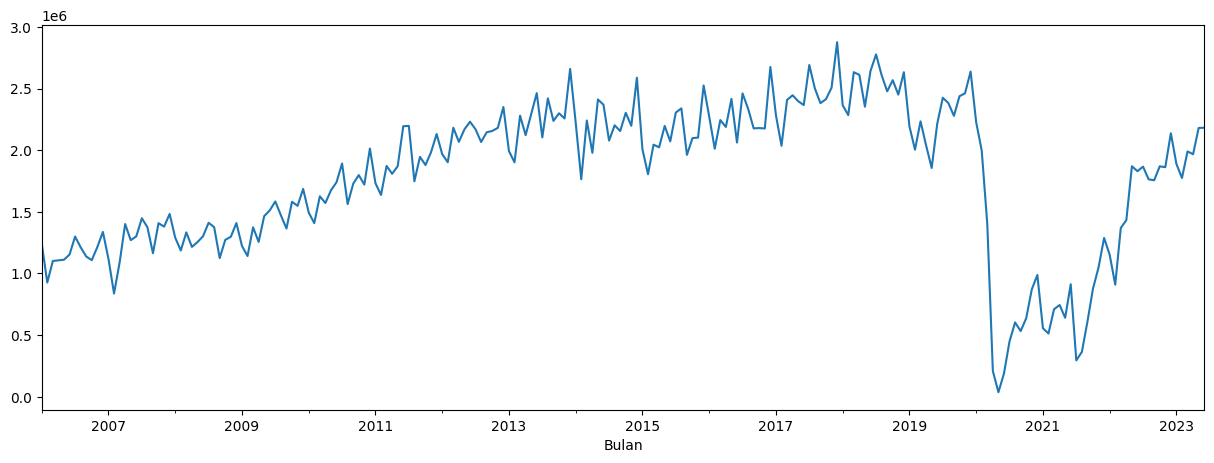

In [ ]:
penumpang.Jumlah_Penumpang.plot(figsize=(15,5))

**Data Pre-Processing**

In [ ]:
cols = list()

In [ ]:
for i in range(1, 0, -1):
    cols.append(df.shift(i))
cols

[            Jumlah_Penumpang
 Bulan                       
 2006-01-01               NaN
 2006-02-01         1243900.0
 2006-03-01          926464.0
 2006-04-01         1101505.0
 2006-05-01         1106096.0
 ...                      ...
 2023-02-01         1888627.0
 2023-03-01         1774580.0
 2023-04-01         1989908.0
 2023-05-01         1967206.0
 2023-06-01         2180563.0
 
 [210 rows x 1 columns]]

In [ ]:
for i in range(0, 1):
    cols.append(df.shift(-i))
cols

[            Jumlah_Penumpang
 Bulan                       
 2006-01-01               NaN
 2006-02-01         1243900.0
 2006-03-01          926464.0
 2006-04-01         1101505.0
 2006-05-01         1106096.0
 ...                      ...
 2023-02-01         1888627.0
 2023-03-01         1774580.0
 2023-04-01         1989908.0
 2023-05-01         1967206.0
 2023-06-01         2180563.0
 
 [210 rows x 1 columns],
             Jumlah_Penumpang
 Bulan                       
 2006-01-01           1243900
 2006-02-01            926464
 2006-03-01           1101505
 2006-04-01           1106096
 2006-05-01           1111419
 ...                      ...
 2023-02-01           1774580
 2023-03-01           1989908
 2023-04-01           1967206
 2023-05-01           2180563
 2023-06-01           2181857
 
 [210 rows x 1 columns]]

In [ ]:
agg = pd.concat(cols, axis=1)
agg

,Jumlah_Penumpang,Jumlah_Penumpang
Bulan,,
2006-01-01,NaN,1243900
2006-02-01,1243900.0,926464
2006-03-01,926464.0,1101505
2006-04-01,1101505.0,1106096
2006-05-01,1106096.0,1111419
...,...,...
2023-02-01,1888627.0,1774580
2023-03-01,1774580.0,1989908
2023-04-01,1989908.0,1967206


In [ ]:
agg.dropna(inplace=True)
agg

,Jumlah_Penumpang,Jumlah_Penumpang
Bulan,,
2006-02-01,1243900.0,926464
2006-03-01,926464.0,1101505
2006-04-01,1101505.0,1106096
2006-05-01,1106096.0,1111419
2006-06-01,1111419.0,1153637
...,...,...
2023-02-01,1888627.0,1774580
2023-03-01,1774580.0,1989908
2023-04-01,1989908.0,1967206


**Train Test Split**

In [ ]:
train, test=agg.iloc[:-10, :],agg.iloc[-10:, :]

In [ ]:
train

,Jumlah_Penumpang,Jumlah_Penumpang
Bulan,,
2006-02-01,1243900.0,926464
2006-03-01,926464.0,1101505
2006-04-01,1101505.0,1106096
2006-05-01,1106096.0,1111419
2006-06-01,1111419.0,1153637
...,...,...
2022-04-01,1369160.0,1432805
2022-05-01,1432805.0,1869751
2022-06-01,1869751.0,1829522


In [ ]:
test

,Jumlah_Penumpang,Jumlah_Penumpang
Bulan,,
2022-09-01,1763843.0,1756099
2022-10-01,1756099.0,1869088
2022-11-01,1869088.0,1862170
2022-12-01,1862170.0,2137273
2023-01-01,2137273.0,1888627
2023-02-01,1888627.0,1774580
2023-03-01,1774580.0,1989908
2023-04-01,1989908.0,1967206
2023-05-01,1967206.0,2180563


In [ ]:
trainX, trainy = train.iloc[:, :-1], train.iloc[:, -1]

**Modeling Data**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(trainX, trainy)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import mean_absolute_error
predictions=[]
actual=[]
for i in range(len(test)):
    testX, testy = test.iloc[i, :-1], test.iloc[i, -1]
    pred = model.predict([testX])
    print("hasil prediksi:"+str(pred[0]))
    predictions.append(pred[0])
    actual.append(testy)
    print("expected= "+str(testy)+ " predicted= "+str(pred))

hasil prediksi:2114471.41
expected= 1756099 predicted= [2114471.41]
hasil prediksi:1997968.49
expected= 1869088 predicted= [1997968.49]
hasil prediksi:1923292.93
expected= 1862170 predicted= [1923292.93]
hasil prediksi:1897039.76
expected= 2137273 predicted= [1897039.76]
hasil prediksi:2040730.74
expected= 1888627 predicted= [2040730.74]
hasil prediksi:1741179.24
expected= 1774580 predicted= [1741179.24]
hasil prediksi:2075713.21
expected= 1989908 predicted= [2075713.21]
hasil prediksi:1920992.12
expected= 1967206 predicted= [1920992.12]
hasil prediksi:2004990.75
expected= 2180563 predicted= [2004990.75]
hasil prediksi:2315507.34
expected= 2181857 predicted= [2315507.34]


In [ ]:
error = mean_absolute_error(actual, predictions)
print(error)

141535.52499999997


In [ ]:
Akurasi = (error/penumpang.count)*100
Akurasi

TypeError: ignored

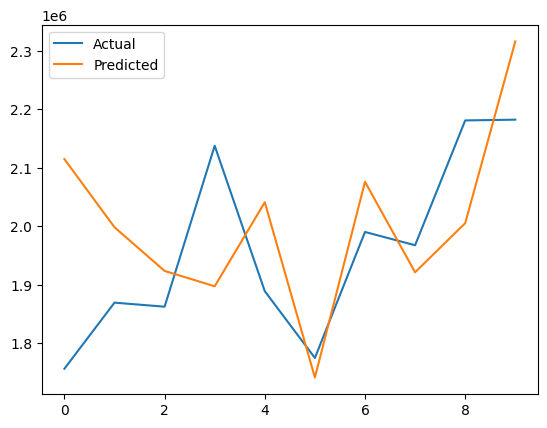

In [ ]:
plt.plot(actual, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [ ]:
df_visual = pd.DataFrame({
    'Bulan':test.reset_index()['Bulan'].to_list(),
    'Actuals':actual
})
df_visual

,Bulan,Actuals
0,2022-09-01,1756099
1,2022-10-01,1869088
2,2022-11-01,1862170
3,2022-12-01,2137273
4,2023-01-01,1888627
5,2023-02-01,1774580
6,2023-03-01,1989908
7,2023-04-01,1967206
8,2023-05-01,2180563
9,2023-06-01,2181857


In [ ]:
df_visual['pred']=predictions
df_visual

,Bulan,Actuals,pred
0,2022-09-01,1756099,2114471.41
1,2022-10-01,1869088,1997968.49
2,2022-11-01,1862170,1923292.93
3,2022-12-01,2137273,1897039.76
4,2023-01-01,1888627,2040730.74
5,2023-02-01,1774580,1741179.24
6,2023-03-01,1989908,2075713.21
7,2023-04-01,1967206,1920992.12
8,2023-05-01,2180563,2004990.75
9,2023-06-01,2181857,2315507.34


In [ ]:
df_visual.set_index('Bulan', inplace=True)
df_visual

,Actuals,pred
Bulan,,
2022-09-01,1756099,2114471.41
2022-10-01,1869088,1997968.49
2022-11-01,1862170,1923292.93
2022-12-01,2137273,1897039.76
2023-01-01,1888627,2040730.74
2023-02-01,1774580,1741179.24
2023-03-01,1989908,2075713.21
2023-04-01,1967206,1920992.12
2023-05-01,2180563,2004990.75


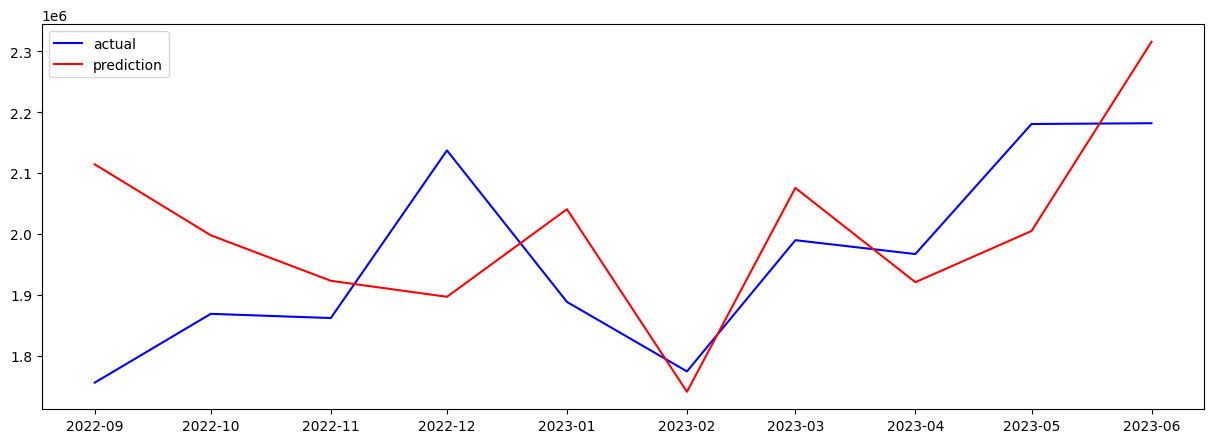

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(df_visual.Actuals, "b-",label='actual')
plt.plot(df_visual.pred, "r-",label='prediction')
plt.legend()

**Predicted**

In [ ]:
result = pd.concat([df, df_visual], axis=1).drop(columns='Actuals')
result

,Jumlah_Penumpang,pred
Bulan,,
2006-01-01,1243900,NaN
2006-02-01,926464,NaN
2006-03-01,1101505,NaN
2006-04-01,1106096,NaN
2006-05-01,1111419,NaN
...,...,...
2023-02-01,1774580,1741179.24
2023-03-01,1989908,2075713.21
2023-04-01,1967206,1920992.12


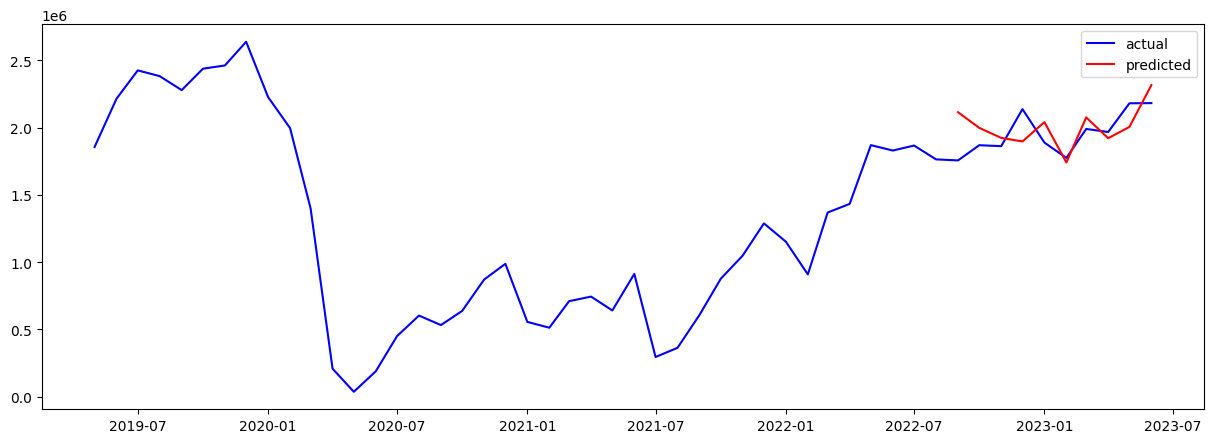

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(result.Jumlah_Penumpang[-50:], "b-",label='actual')
plt.plot(result.pred, "r-",label='predicted')
plt.legend()

**Predicted to Predicted**

In [ ]:
df_visual

,Actuals,pred
Bulan,,
2022-09-01,1756099,2114471.41
2022-10-01,1869088,1997968.49
2022-11-01,1862170,1923292.93
2022-12-01,2137273,1897039.76
2023-01-01,1888627,2040730.74
2023-02-01,1774580,1741179.24
2023-03-01,1989908,2075713.21
2023-04-01,1967206,1920992.12
2023-05-01,2180563,2004990.75


In [ ]:
from sklearn.metrics import mean_absolute_error
predictions2=[]
actual2=[]
for i in range(len(test)):
    testX, testy = df_visual.iloc[i, :-1], df_visual.iloc[i, -2]
    pred = model.predict([testX])
    print("hasil prediksi:"+str(pred[0]))
    predictions2.append(pred[0])
    actual2.append(testy)
    print("expected= "+str(testy)+ " predicted= "+str(pred))

hasil prediksi:1997968.49
expected= 1756099 predicted= [1997968.49]
hasil prediksi:1923292.93
expected= 1869088 predicted= [1923292.93]
hasil prediksi:1897039.76
expected= 1862170 predicted= [1897039.76]
hasil prediksi:2040730.74
expected= 2137273 predicted= [2040730.74]
hasil prediksi:1741179.24
expected= 1888627 predicted= [1741179.24]
hasil prediksi:2075713.21
expected= 1774580 predicted= [2075713.21]
hasil prediksi:1920992.12
expected= 1989908 predicted= [1920992.12]
hasil prediksi:2004990.75
expected= 1967206 predicted= [2004990.75]
hasil prediksi:2315507.34
expected= 2180563 predicted= [2315507.34]
hasil prediksi:2161931.61
expected= 2181857 predicted= [2161931.61]


In [ ]:
for i in range(len(predictions2)):
    predictions.append(predictions2[i])

In [ ]:
predict2=pd.Series(predictions,pd.date_range('7/2023',freq='m',periods=20))

In [ ]:
predict2=pd.DataFrame(predict2,columns=["pred"])
result2 = pd.concat([df, predict2], axis=1)
result2
result2.tail(50)

,Jumlah_Penumpang,pred
2021-01-01,556203.0,NaN
2021-02-01,512951.0,NaN
2021-03-01,710317.0,NaN
2021-04-01,744235.0,NaN
2021-05-01,641128.0,NaN
2021-06-01,912890.0,NaN
2021-07-01,295197.0,NaN
2021-08-01,363632.0,NaN
2021-09-01,607658.0,NaN
2021-10-01,876318.0,NaN


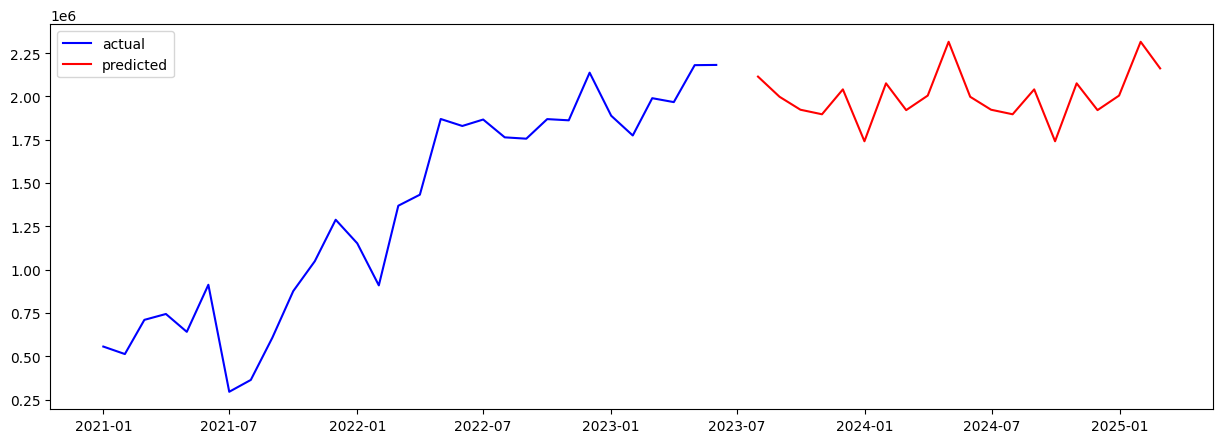

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(result2.Jumlah_Penumpang[-50:], "b-",label='actual')
plt.plot(result2.pred, "r-",label='predicted')
plt.legend()

In [ ]:
max(predictions)

2315507.34

In [ ]:
result2[result2.pred>2000000]

,Jumlah_Penumpang,pred
2023-07-31,NaN,2114471.41
2023-11-30,NaN,2040730.74
2024-01-31,NaN,2075713.21
2024-03-31,NaN,2004990.75
2024-04-30,NaN,2315507.34
2024-08-31,NaN,2040730.74
2024-10-31,NaN,2075713.21
2024-12-31,NaN,2004990.75
2025-01-31,NaN,2315507.34
2025-02-28,NaN,2161931.61


In [ ]:
result2

,Jumlah_Penumpang,pred
2006-01-01,1243900.0,NaN
2006-02-01,926464.0,NaN
2006-03-01,1101505.0,NaN
2006-04-01,1106096.0,NaN
2006-05-01,1111419.0,NaN
...,...,...
2024-10-31,NaN,2075713.21
2024-11-30,NaN,1920992.12
2024-12-31,NaN,2004990.75
2025-01-31,NaN,2315507.34


In [ ]:
result2.tail(20)

,Jumlah_Penumpang,pred
2023-07-31,NaN,2114471.41
2023-08-31,NaN,1997968.49
2023-09-30,NaN,1923292.93
2023-10-31,NaN,1897039.76
2023-11-30,NaN,2040730.74
2023-12-31,NaN,1741179.24
2024-01-31,NaN,2075713.21
2024-02-29,NaN,1920992.12
2024-03-31,NaN,2004990.75
2024-04-30,NaN,2315507.34


In [ ]:
df_tinggi=result2[result2.pred>2000000]

In [ ]:
Max_jumlah = max(df_tinggi.pred)
Max_jumlah

2315507.34

Dari hasil prediksi jumlah penumpang bulanan yang menggunakan pesawat di Soekarno Hatta menghasil